In [2]:
#%%
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.cta_strategy.strategies.tsmyo_rbk_strategy import (
    TSMyoRBKStrategy,
)
from datetime import datetime

In [20]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="IF9999.CFFEX",
    interval="1m",
    start=datetime(2012, 1, 1),
    end=datetime(2019, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=500_000,
)
engine.add_strategy(TSMyoRBKStrategy, {'fixed_size': 1,'atr_stop': 4, 'atr_window': 44, 'atr_ma_len': 22, 'trailing_short':0.4,'trailing_long':0.4})

2019-12-15 13:00:06.039117	开始加载历史数据
2019-12-15 13:00:06.039117	加载进度： [1%]
2019-12-15 13:00:06.040119	加载进度： [2%]
2019-12-15 13:00:06.040119	加载进度： [4%]
2019-12-15 13:00:06.040119	加载进度： [5%]
2019-12-15 13:00:06.040119	加载进度： [6%]
2019-12-15 13:00:06.040119	加载进度： [7%]
2019-12-15 13:00:06.040119	加载进度： [8%]
2019-12-15 13:00:06.040119	加载进度： [9%]
2019-12-15 13:00:06.041121	加载进度：# [11%]
2019-12-15 13:00:06.041121	加载进度：# [12%]
2019-12-15 13:00:06.041121	加载进度：# [13%]
2019-12-15 13:00:06.041121	加载进度：# [14%]
2019-12-15 13:00:06.041121	加载进度：# [15%]
2019-12-15 13:00:06.041121	加载进度：# [16%]
2019-12-15 13:00:06.041121	加载进度：# [18%]
2019-12-15 13:00:06.041121	加载进度：# [19%]
2019-12-15 13:00:06.041121	加载进度：# [20%]
2019-12-15 13:00:06.041121	加载进度：## [21%]
2019-12-15 13:00:06.041121	加载进度：## [22%]
2019-12-15 13:00:06.042122	加载进度：## [23%]
2019-12-15 13:00:06.042122	加载进度：## [25%]
2019-12-15 13:00:06.042122	加载进度：## [26%]
2019-12-15 13:00:06.042122	加载进度：## [27%]
2019-12-15 13:00:06.042122	加载进度：## [28%]
2019-12-15 13

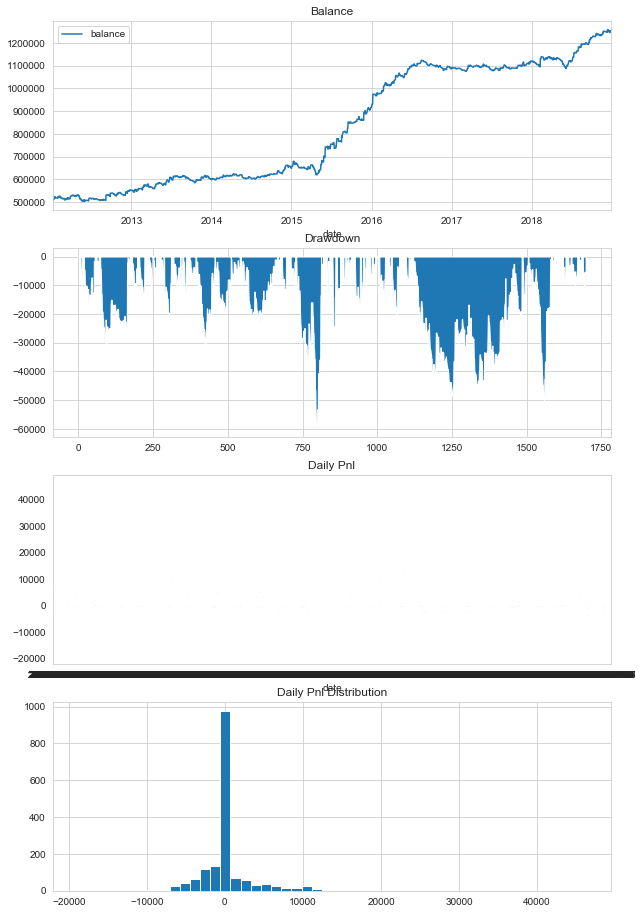

In [21]:
#%%
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [22]:
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
setting.add_parameter("atr_stop", 3, 6, 0.5) # 4
setting.add_parameter("trailing_short", 0.3, 0.6, 0.05) # 0.4
setting.add_parameter("trailing_long", 0.3, 0.6, 0.05) # 0.4
#setting.add_parameter("atr_window", 20, 60, 4) # 44
#setting.add_parameter("atr_ma_len", 10, 30, 2) # 22

engine.run_optimization(setting)

2019-12-15 13:16:23.803458	参数：{'atr_stop': 4.0, 'trailing_short': 0.6, 'trailing_long': 0.5499999999999999}, 目标：1.648961980080973
2019-12-15 13:16:23.803458	参数：{'atr_stop': 4.0, 'trailing_short': 0.5499999999999999, 'trailing_long': 0.5499999999999999}, 目标：1.6457066508267524
2019-12-15 13:16:23.803458	参数：{'atr_stop': 4.0, 'trailing_short': 0.49999999999999994, 'trailing_long': 0.5499999999999999}, 目标：1.6294677200859868
2019-12-15 13:16:23.803458	参数：{'atr_stop': 4.0, 'trailing_short': 0.6, 'trailing_long': 0.6}, 目标：1.6233159781469535
2019-12-15 13:16:23.803458	参数：{'atr_stop': 4.0, 'trailing_short': 0.44999999999999996, 'trailing_long': 0.5499999999999999}, 目标：1.6216422601249432
2019-12-15 13:16:23.803458	参数：{'atr_stop': 4.0, 'trailing_short': 0.5499999999999999, 'trailing_long': 0.6}, 目标：1.619263195540721
2019-12-15 13:16:23.803458	参数：{'atr_stop': 4.0, 'trailing_short': 0.6, 'trailing_long': 0.49999999999999994}, 目标：1.6125828555871107
2019-12-15 13:16:23.803458	参数：{'atr_stop': 4.0, 'tra

[("{'atr_stop': 4.0, 'trailing_short': 0.6, 'trailing_long': 0.5499999999999999}",
  1.648961980080973,
  {'start_date': datetime.date(2012, 1, 9),
   'end_date': datetime.date(2018, 12, 28),
   'total_days': 1698,
   'profit_days': 386,
   'loss_days': 438,
   'capital': 500000,
   'end_balance': 1387299.8329999961,
   'max_drawdown': -56857.6277999999,
   'max_ddpercent': -6.119310824766669,
   'max_drawdown_duration': 114,
   'total_net_pnl': 887299.8329999958,
   'daily_net_pnl': 522.555849823319,
   'total_commission': 83200.16699999999,
   'daily_commission': 48.99892049469964,
   'total_slippage': 179160.0,
   'daily_slippage': 105.51236749116607,
   'total_turnover': 2773338900.0,
   'daily_turnover': 1633297.3498233214,
   'total_trade_count': 2986,
   'daily_trade_count': 1.7585394581861014,
   'total_return': 177.45996659999923,
   'annual_return': 25.082680791519326,
   'daily_return': 0.05904371265813904,
   'return_std': 0.5547133738329112,
   'sharpe_ratio': 1.6489619800

2019-12-14 19:51:44.114405	开始加载历史数据
2019-12-14 19:51:44.413192	加载进度： [10%]
2019-12-14 19:51:44.645125	加载进度：# [20%]
2019-12-14 19:51:44.901688	加载进度：## [30%]
2019-12-14 19:51:45.175895	加载进度：### [39%]
2019-12-14 19:51:45.438904	加载进度：#### [49%]
2019-12-14 19:51:46.106842	加载进度：##### [59%]
2019-12-14 19:51:46.383810	加载进度：###### [69%]
2019-12-14 19:51:46.681055	加载进度：####### [79%]
2019-12-14 19:51:46.970185	加载进度：######## [89%]
2019-12-14 19:51:47.157840	加载进度：######### [99%]
2019-12-14 19:51:47.209750	加载进度：########## [100%]
2019-12-14 19:51:47.209750	历史数据加载完成，数据量：48240
2019-12-14 19:51:47.225361	策略初始化完成
2019-12-14 19:51:47.225361	开始回放历史数据
2019-12-14 19:51:49.039010	历史数据回放结束
2019-12-14 19:51:49.039010	开始计算逐日盯市盈亏
2019-12-14 19:51:49.039010	逐日盯市盈亏计算完成
2019-12-14 19:51:49.039010	开始计算策略统计指标
2019-12-14 19:51:49.054970	------------------------------
2019-12-14 19:51:49.054970	首个交易日：	2019-01-07
2019-12-14 19:51:49.054970	最后交易日：	2019-10-31
2019-12-14 19:51:49.054970	总交易日：	198
2019-12-14 19:51:49.054970	

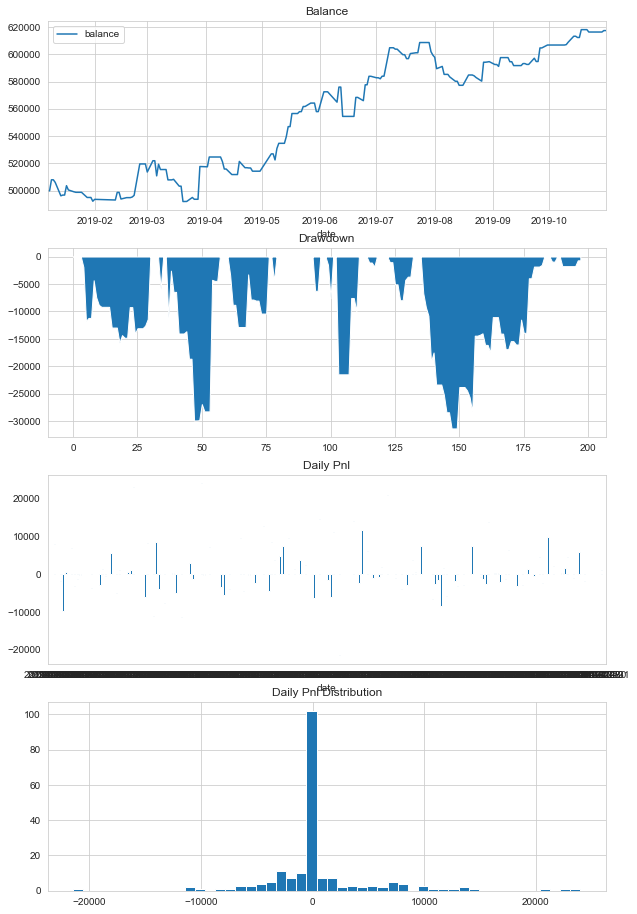

In [6]:
# 样本外。2019
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IF9999.CFFEX",
    interval="1m",
    start=datetime(2019, 1, 1),
    end=datetime(2019, 11, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'atr_stop': 4, 'atr_window': 44, 'atr_ma_len': 22, 'trailing_short':0.4,'trailing_long':0.4})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

2019-12-15 11:36:35.992832	开始加载历史数据
2019-12-15 11:36:35.992832	加载进度： [8%]
2019-12-15 11:36:36.008458	加载进度：# [16%]
2019-12-15 11:36:36.008458	加载进度：## [25%]
2019-12-15 11:36:36.008458	加载进度：### [33%]
2019-12-15 11:36:36.008458	加载进度：#### [41%]
2019-12-15 11:36:36.024085	加载进度：#### [49%]
2019-12-15 11:36:36.024085	加载进度：##### [57%]
2019-12-15 11:36:36.024085	加载进度：###### [66%]
2019-12-15 11:36:36.024085	加载进度：####### [74%]
2019-12-15 11:36:36.039711	加载进度：######## [82%]
2019-12-15 11:36:36.039711	加载进度：######### [90%]
2019-12-15 11:36:36.039711	加载进度：######### [98%]
2019-12-15 11:36:36.039711	加载进度：########## [100%]
2019-12-15 11:36:36.039711	历史数据加载完成，数据量：65610
2019-12-15 11:36:36.070962	策略初始化完成
2019-12-15 11:36:36.070962	开始回放历史数据
2019-12-15 11:36:38.575827	历史数据回放结束
2019-12-15 11:36:38.575827	开始计算逐日盯市盈亏
2019-12-15 11:36:38.607080	逐日盯市盈亏计算完成
2019-12-15 11:36:38.607080	开始计算策略统计指标
2019-12-15 11:36:38.622707	------------------------------
2019-12-15 11:36:38.622707	首个交易日：	2012-01-09
2019-12-15 11:36:38

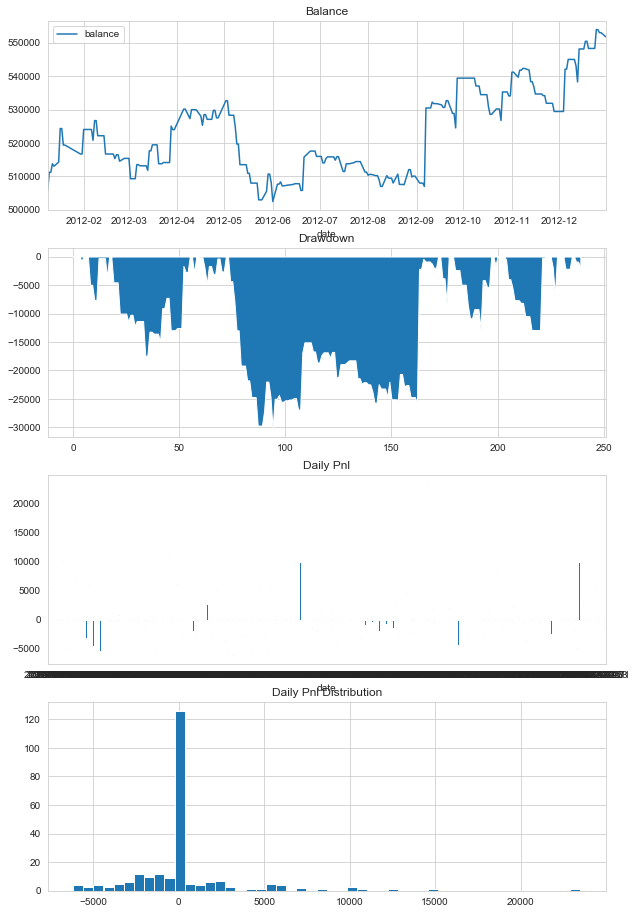

In [12]:
# 样本内每年 2012-13
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IF9999.CFFEX",
    interval="1m",
    start=datetime(2012, 1, 1),
    end=datetime(2013, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'fixed_size':1,'atr_stop': 4, 'atr_window': 44, 'atr_ma_len': 22, 'trailing_short':0.4,'trailing_long':0.4})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

2019-12-15 11:37:07.135930	开始加载历史数据
2019-12-15 11:37:07.424572	加载进度： [8%]
2019-12-15 11:37:07.666546	加载进度：# [16%]
2019-12-15 11:37:09.059467	加载进度：## [25%]
2019-12-15 11:37:09.304669	加载进度：### [33%]
2019-12-15 11:37:09.613621	加载进度：#### [41%]
2019-12-15 11:37:09.861116	加载进度：#### [49%]
2019-12-15 11:37:10.174723	加载进度：##### [58%]
2019-12-15 11:37:10.492651	加载进度：###### [66%]
2019-12-15 11:37:10.766200	加载进度：####### [74%]
2019-12-15 11:37:10.992145	加载进度：######## [82%]
2019-12-15 11:37:11.300088	加载进度：######### [90%]
2019-12-15 11:37:11.628568	加载进度：######### [99%]
2019-12-15 11:37:11.675448	加载进度：########## [100%]
2019-12-15 11:37:11.675448	历史数据加载完成，数据量：64260
2019-12-15 11:37:11.691076	策略初始化完成
2019-12-15 11:37:11.691076	开始回放历史数据
2019-12-15 11:37:14.007783	历史数据回放结束
2019-12-15 11:37:14.007783	开始计算逐日盯市盈亏
2019-12-15 11:37:14.023400	逐日盯市盈亏计算完成
2019-12-15 11:37:14.023400	开始计算策略统计指标
2019-12-15 11:37:14.023400	------------------------------
2019-12-15 11:37:14.023400	首个交易日：	2013-01-09
2019-12-15 11:37:14

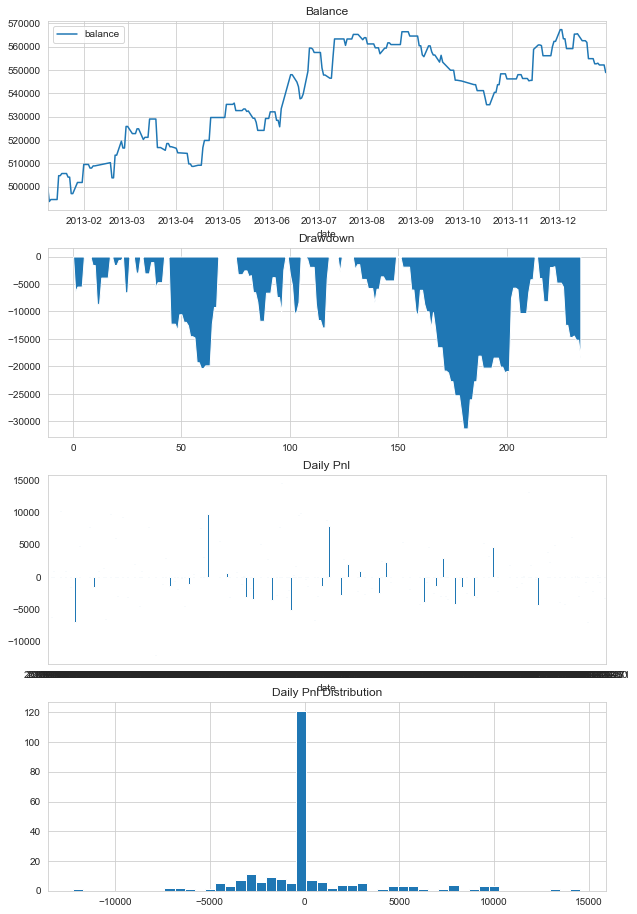

In [13]:
# 样本内每年 2013-14
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IF9999.CFFEX",
    interval="1m",
    start=datetime(2013, 1, 1),
    end=datetime(2014, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'fixed_size':1,'atr_stop': 4, 'atr_window': 44, 'atr_ma_len': 22, 'trailing_short':0.4,'trailing_long':0.4})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

2019-12-15 11:37:47.168023	开始加载历史数据
2019-12-15 11:37:47.470247	加载进度： [8%]
2019-12-15 11:37:48.204386	加载进度：# [16%]
2019-12-15 11:37:48.502790	加载进度：## [25%]
2019-12-15 11:37:48.808207	加载进度：### [33%]
2019-12-15 11:37:49.103972	加载进度：#### [41%]
2019-12-15 11:37:49.384839	加载进度：#### [49%]
2019-12-15 11:37:49.691043	加载进度：##### [58%]
2019-12-15 11:37:50.033266	加载进度：###### [66%]
2019-12-15 11:37:50.316836	加载进度：####### [74%]
2019-12-15 11:37:50.551482	加载进度：######## [82%]
2019-12-15 11:37:50.859485	加载进度：######### [90%]
2019-12-15 11:37:51.174231	加载进度：######### [99%]
2019-12-15 11:37:51.221108	加载进度：########## [100%]
2019-12-15 11:37:51.221108	历史数据加载完成，数据量：66150
2019-12-15 11:37:51.236734	策略初始化完成
2019-12-15 11:37:51.236734	开始回放历史数据
2019-12-15 11:37:53.623433	历史数据回放结束
2019-12-15 11:37:53.623433	开始计算逐日盯市盈亏
2019-12-15 11:37:53.639059	逐日盯市盈亏计算完成
2019-12-15 11:37:53.639059	开始计算策略统计指标
2019-12-15 11:37:53.639059	------------------------------
2019-12-15 11:37:53.639059	首个交易日：	2014-01-07
2019-12-15 11:37:53

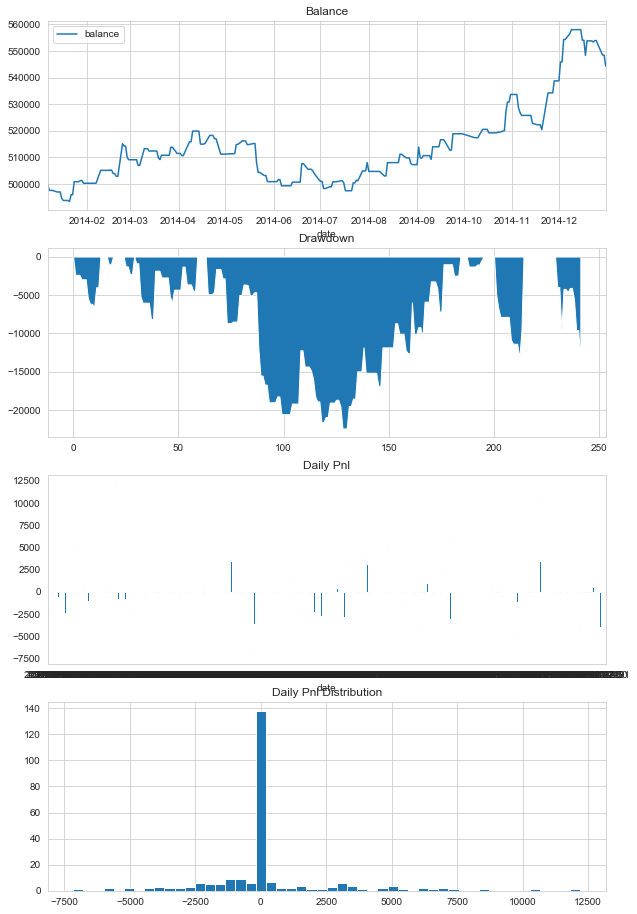

In [14]:
# 样本内每年 2014-15
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IF9999.CFFEX",
    interval="1m",
    start=datetime(2014, 1, 1),
    end=datetime(2015, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'fixed_size':1,'atr_stop': 4, 'atr_window': 44, 'atr_ma_len': 22, 'trailing_short':0.4,'trailing_long':0.4})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

2019-12-15 11:38:58.001148	开始加载历史数据
2019-12-15 11:38:58.273840	加载进度： [8%]
2019-12-15 11:38:59.026673	加载进度：# [16%]
2019-12-15 11:38:59.339364	加载进度：## [25%]
2019-12-15 11:38:59.639022	加载进度：### [33%]
2019-12-15 11:38:59.932036	加载进度：#### [41%]
2019-12-15 11:39:00.218008	加载进度：#### [49%]
2019-12-15 11:39:00.541493	加载进度：##### [58%]
2019-12-15 11:39:00.854007	加载进度：###### [66%]
2019-12-15 11:39:01.117216	加载进度：####### [74%]
2019-12-15 11:39:01.367153	加载进度：######## [82%]
2019-12-15 11:39:01.680618	加载进度：######### [90%]
2019-12-15 11:39:01.974658	加载进度：######### [99%]
2019-12-15 11:39:02.037163	加载进度：########## [100%]
2019-12-15 11:39:02.037163	历史数据加载完成，数据量：65880
2019-12-15 11:39:02.053830	策略初始化完成
2019-12-15 11:39:02.053830	开始回放历史数据
2019-12-15 11:39:04.540066	历史数据回放结束
2019-12-15 11:39:04.540066	开始计算逐日盯市盈亏
2019-12-15 11:39:04.546072	逐日盯市盈亏计算完成
2019-12-15 11:39:04.546072	开始计算策略统计指标
2019-12-15 11:39:04.553077	------------------------------
2019-12-15 11:39:04.553077	首个交易日：	2015-01-08
2019-12-15 11:39:04

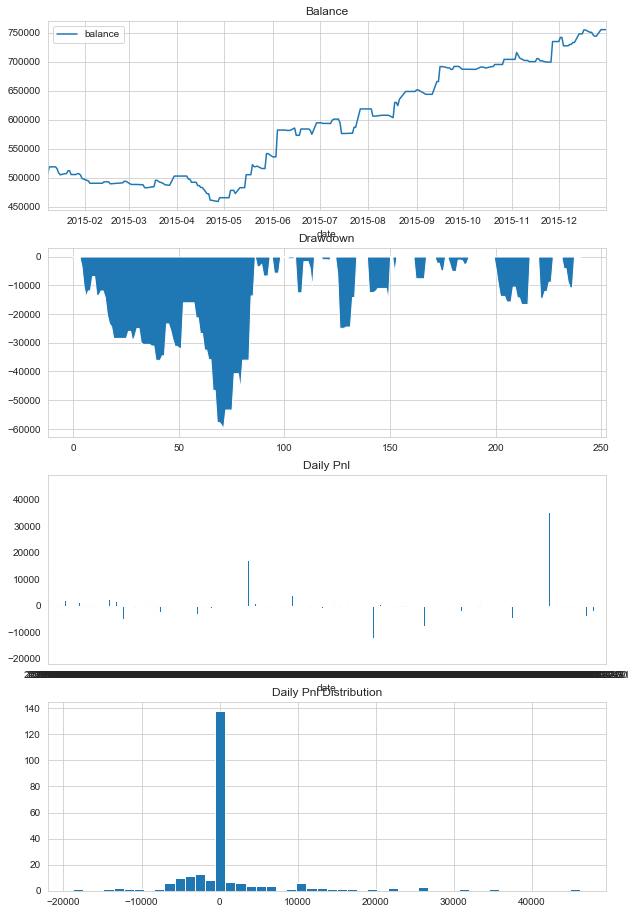

In [15]:
# 样本内每年 2015-16
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IF9999.CFFEX",
    interval="1m",
    start=datetime(2015, 1, 1),
    end=datetime(2016, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'fixed_size':1,'atr_stop': 4, 'atr_window': 44, 'atr_ma_len': 22, 'trailing_short':0.4,'trailing_long':0.4})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

2019-12-15 11:39:52.077551	开始加载历史数据
2019-12-15 11:39:52.343298	加载进度： [8%]
2019-12-15 11:39:52.544103	加载进度：# [16%]
2019-12-15 11:39:53.461636	加载进度：## [25%]
2019-12-15 11:39:53.741013	加载进度：### [33%]
2019-12-15 11:39:53.987743	加载进度：#### [41%]
2019-12-15 11:39:54.248214	加载进度：#### [49%]
2019-12-15 11:39:54.531569	加载进度：##### [57%]
2019-12-15 11:39:54.804816	加载进度：###### [66%]
2019-12-15 11:39:55.050166	加载进度：####### [74%]
2019-12-15 11:39:55.270870	加载进度：######## [82%]
2019-12-15 11:39:55.553315	加载进度：######### [90%]
2019-12-15 11:39:55.815060	加载进度：######### [98%]
2019-12-15 11:39:55.880120	加载进度：########## [100%]
2019-12-15 11:39:55.881121	历史数据加载完成，数据量：58560
2019-12-15 11:39:55.896134	策略初始化完成
2019-12-15 11:39:55.896134	开始回放历史数据
2019-12-15 11:39:58.071214	历史数据回放结束
2019-12-15 11:39:58.071214	开始计算逐日盯市盈亏
2019-12-15 11:39:58.076209	逐日盯市盈亏计算完成
2019-12-15 11:39:58.076209	开始计算策略统计指标
2019-12-15 11:39:58.082214	------------------------------
2019-12-15 11:39:58.083215	首个交易日：	2016-01-07
2019-12-15 11:39:58

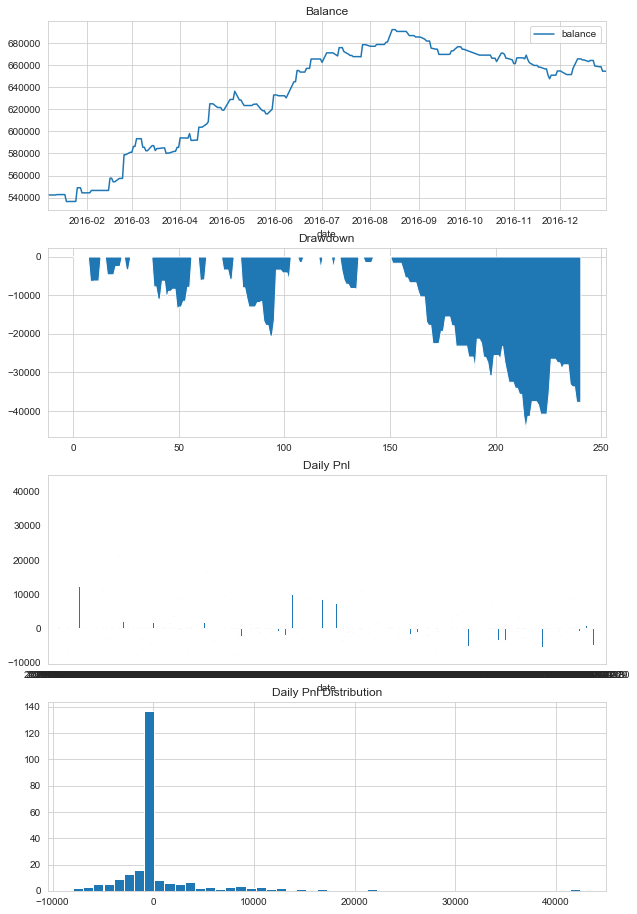

In [16]:
# 样本内每年 2016-17
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IF9999.CFFEX",
    interval="1m",
    start=datetime(2016, 1, 1),
    end=datetime(2017, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'fixed_size':1,'atr_stop': 4, 'atr_window': 44, 'atr_ma_len': 22, 'trailing_short':0.4,'trailing_long':0.4})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

2019-12-15 11:40:23.973012	开始加载历史数据
2019-12-15 11:40:24.211365	加载进度： [8%]
2019-12-15 11:40:24.458767	加载进度：# [16%]
2019-12-15 11:40:24.745090	加载进度：## [25%]
2019-12-15 11:40:24.982931	加载进度：### [33%]
2019-12-15 11:40:25.226152	加载进度：#### [41%]
2019-12-15 11:40:25.512171	加载进度：#### [49%]
2019-12-15 11:40:25.781553	加载进度：##### [58%]
2019-12-15 11:40:26.712826	加载进度：###### [66%]
2019-12-15 11:40:26.990573	加载进度：####### [74%]
2019-12-15 11:40:27.222444	加载进度：######## [82%]
2019-12-15 11:40:27.484755	加载进度：######### [90%]
2019-12-15 11:40:27.769014	加载进度：######### [99%]
2019-12-15 11:40:27.809051	加载进度：########## [100%]
2019-12-15 11:40:27.809051	历史数据加载完成，数据量：58560
2019-12-15 11:40:27.824063	策略初始化完成
2019-12-15 11:40:27.824063	开始回放历史数据
2019-12-15 11:40:29.991299	历史数据回放结束
2019-12-15 11:40:29.991299	开始计算逐日盯市盈亏
2019-12-15 11:40:29.996304	逐日盯市盈亏计算完成
2019-12-15 11:40:29.996304	开始计算策略统计指标
2019-12-15 11:40:30.003311	------------------------------
2019-12-15 11:40:30.003827	首个交易日：	2017-01-06
2019-12-15 11:40:30

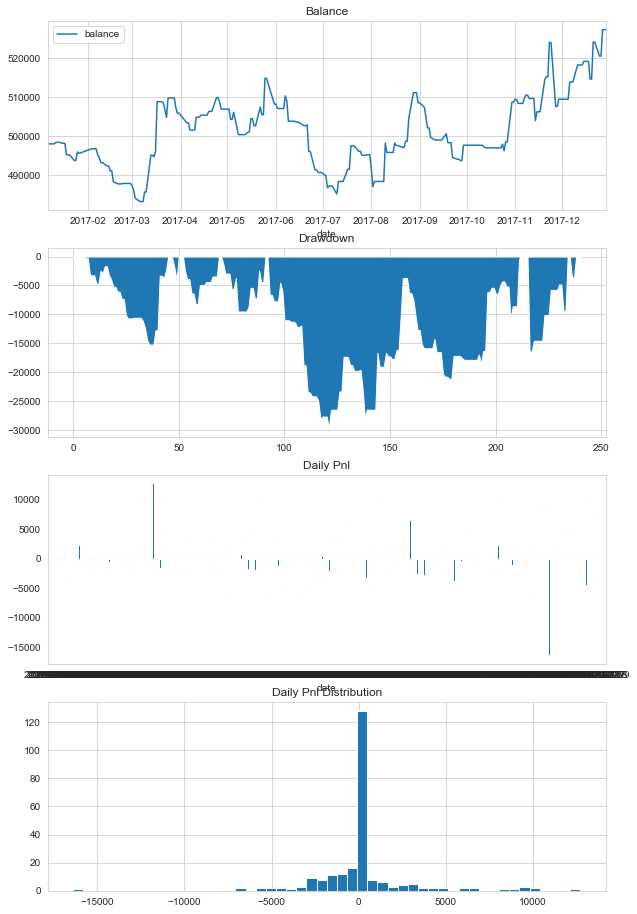

In [17]:
# 样本内每年 2017-18
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IF9999.CFFEX",
    interval="1m",
    start=datetime(2017, 1, 1),
    end=datetime(2018, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'fixed_size':1,'atr_stop': 4, 'atr_window': 44, 'atr_ma_len': 22, 'trailing_short':0.4,'trailing_long':0.4})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

2019-12-15 11:41:00.150024	开始加载历史数据
2019-12-15 11:41:00.420937	加载进度： [8%]
2019-12-15 11:41:00.636133	加载进度：# [16%]
2019-12-15 11:41:00.908495	加载进度：## [25%]
2019-12-15 11:41:01.137914	加载进度：### [33%]
2019-12-15 11:41:01.404156	加载进度：#### [41%]
2019-12-15 11:41:01.671507	加载进度：#### [49%]
2019-12-15 11:41:01.927245	加载进度：##### [58%]
2019-12-15 11:41:02.212341	加载进度：###### [66%]
2019-12-15 11:41:02.488714	加载进度：####### [74%]
2019-12-15 11:41:02.704199	加载进度：######## [82%]
2019-12-15 11:41:02.973548	加载进度：######### [90%]
2019-12-15 11:41:03.255979	加载进度：######### [99%]
2019-12-15 11:41:03.283003	加载进度：########## [100%]
2019-12-15 11:41:03.283003	历史数据加载完成，数据量：58320
2019-12-15 11:41:03.303021	策略初始化完成
2019-12-15 11:41:03.303021	开始回放历史数据
2019-12-15 11:41:06.226962	历史数据回放结束
2019-12-15 11:41:06.227964	开始计算逐日盯市盈亏
2019-12-15 11:41:06.231967	逐日盯市盈亏计算完成
2019-12-15 11:41:06.231967	开始计算策略统计指标
2019-12-15 11:41:06.237963	------------------------------
2019-12-15 11:41:06.237963	首个交易日：	2018-01-05
2019-12-15 11:41:06

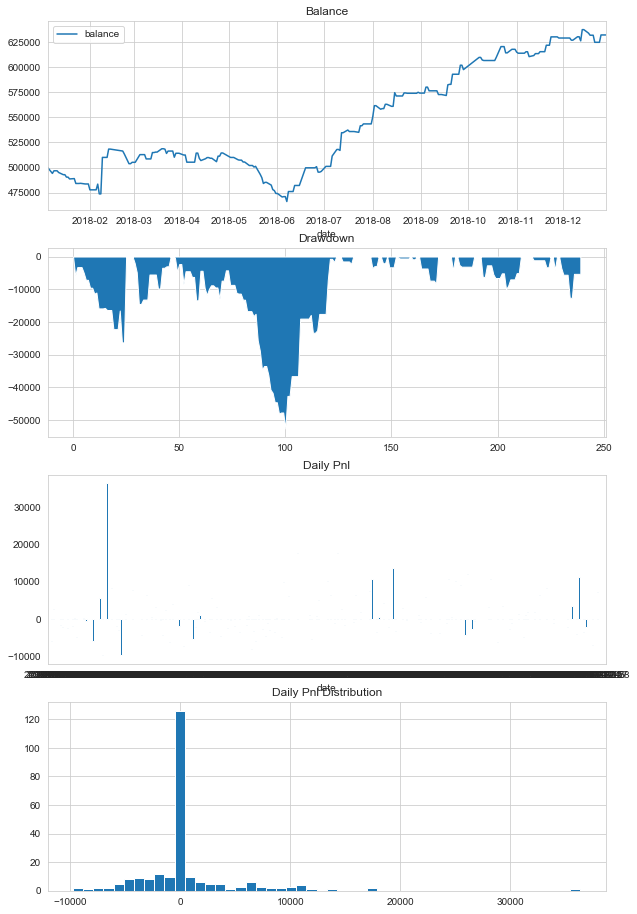

In [18]:
# 样本内每年 2018-19
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IF9999.CFFEX",
    interval="1m",
    start=datetime(2018, 1, 1),
    end=datetime(2019, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'fixed_size':1,'atr_stop': 4, 'atr_window': 44, 'atr_ma_len': 22, 'trailing_short':0.4,'trailing_long':0.4})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

2019-12-15 13:48:57.940749	开始加载历史数据
2019-12-15 13:48:58.144441	加载进度： [1%]
2019-12-15 13:48:58.463237	加载进度： [2%]
2019-12-15 13:48:58.786530	加载进度： [4%]
2019-12-15 13:48:59.534715	加载进度： [5%]
2019-12-15 13:48:59.830984	加载进度： [6%]
2019-12-15 13:49:00.144269	加载进度： [7%]
2019-12-15 13:49:00.453059	加载进度： [8%]
2019-12-15 13:49:00.762339	加载进度： [9%]
2019-12-15 13:49:01.082631	加载进度：# [11%]
2019-12-15 13:49:01.332858	加载进度：# [12%]
2019-12-15 13:49:01.626363	加载进度：# [13%]
2019-12-15 13:49:02.250932	加载进度：# [14%]
2019-12-15 13:49:02.527688	加载进度：# [15%]
2019-12-15 13:49:02.763903	加载进度：# [16%]
2019-12-15 13:49:03.068180	加载进度：# [18%]
2019-12-15 13:49:03.361447	加载进度：# [19%]
2019-12-15 13:49:03.644208	加载进度：# [20%]
2019-12-15 13:49:03.891435	加载进度：## [21%]
2019-12-15 13:49:04.210724	加载进度：## [22%]
2019-12-15 13:49:04.529522	加载进度：## [23%]
2019-12-15 13:49:04.806774	加载进度：## [25%]
2019-12-15 13:49:05.386807	加载进度：## [26%]
2019-12-15 13:49:05.709623	加载进度：## [27%]
2019-12-15 13:49:06.035918	加载进度：## [28%]
2019-12-15 13

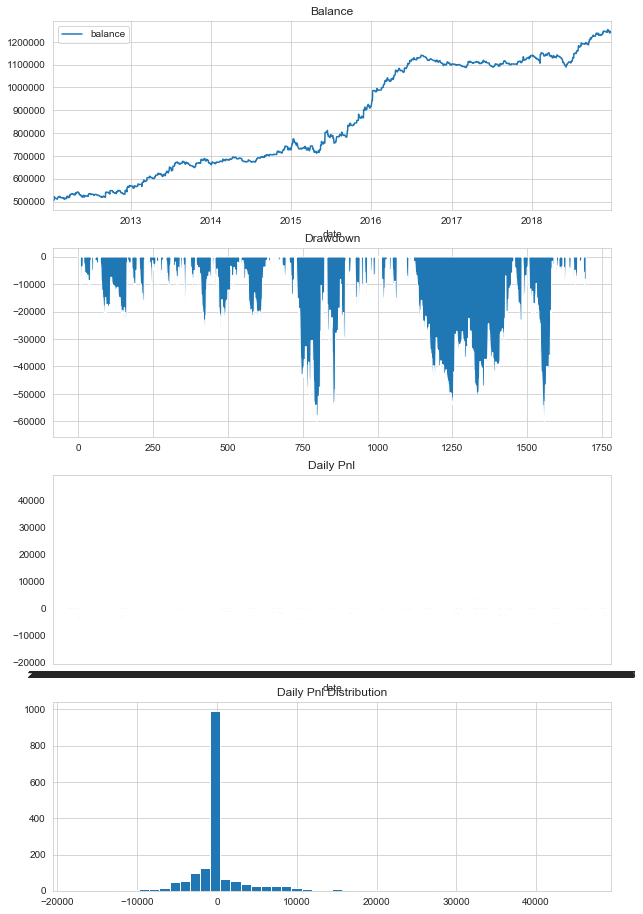

In [5]:
# 样本内
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IF9999.CFFEX",
    interval="1m",
    start=datetime(2012, 1, 1),
    end=datetime(2019, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'limited_size':6,'fixed_size':1,'atr_stop': 4, 'atr_window': 44, 'atr_ma_len': 22, 'trailing_short':0.55,'trailing_long':0.55})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

In [1]:
x = 5300*200*0.12